In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('breast-cancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dropping any non-numerical ID columns

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Importing SVC and finding accuracy_score

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)


print("Linear SVM Test Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("RBF SVM Test Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))


Linear SVM Test Accuracy: 0.9766081871345029
RBF SVM Test Accuracy: 0.9766081871345029


Dimensional Reduction using PCA

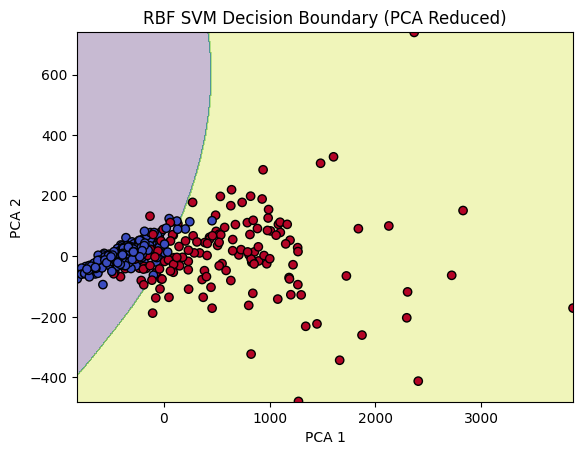

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
svm_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_pca.fit(X_train_pca, y_train_pca)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(svm_pca, X_train_pca, y_train_pca, "RBF SVM Decision Boundary (PCA Reduced)")


Tuning Hyperparameters

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9672784810126581


Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.62280702 0.62280702 0.63157895 0.64035088 0.61946903]
Mean CV Accuracy: 0.6274025772395591
